In [1]:
# Dataset : UpdatedResumeDataset.csv
# Location: https://mitu.co.in/datasets

### Load Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read the data

In [3]:
df=pd.read_csv("UpdatedResumeDataSet.csv")
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


### Seperate input output data

In [4]:
X=df['Resume']
y=df['Category']

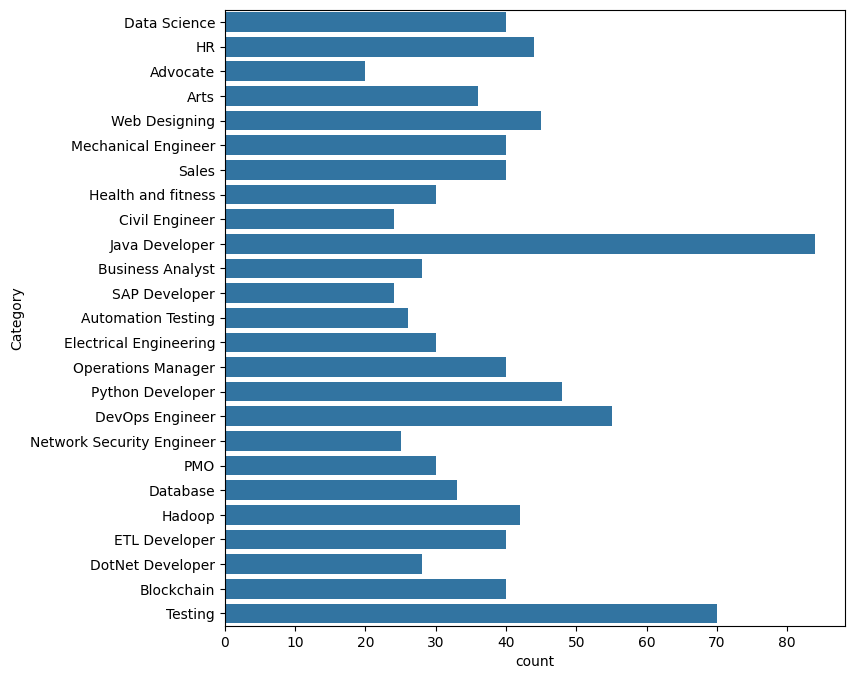

In [5]:
plt.figure(figsize=(8,8))
sns.countplot(y=y);

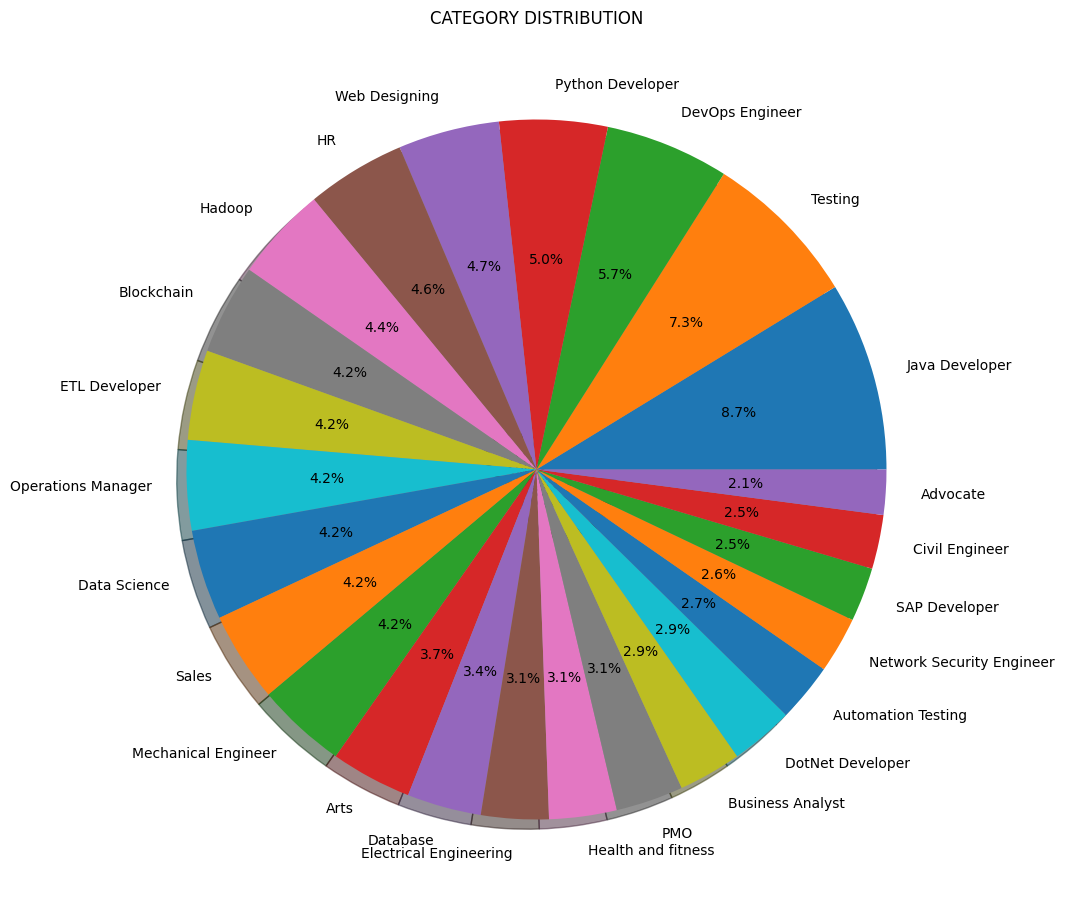

In [11]:
from matplotlib.gridspec import GridSpec
targetCount= df['Category'].value_counts()
targetLabels= df['Category'].value_counts().index
#Make square figure and axes
plt.figure(1,figsize=(25,25))
the_grid=GridSpec(2,2)

plt.subplot(the_grid[0,1],aspect=1,
           title='CATEGORY DISTRIBUTION')
plt.pie(targetCount,labels=targetLabels,autopct='%1.1f%%',shadow=True)
plt.show()

In [8]:
import re

In [48]:
def cleanResume(resumeText):
    resumeText=re.sub('http\S+\s*'," ",resumeText)  #remove Upper
    resumeText=re.sub('RT|cc'," ",resumeText) #remove RT and cc
    resumeText=re.sub('#\S+'," ",resumeText)  #remove hashtag
    resumeText=re.sub('@\S+'," ",resumeText)  #remove mention
    resumeText=re.sub('[%s]'% re.escape("""!"#$%&'()*,-./:;<=>?@[\]^_`{\}~""")," ",resumeText)  
    #remove punctuation
    
    resumeText= re.sub(r'[^\x00-\x7f]',r' ',resumeText)
    resumeText= re.sub('\s+',r' ',resumeText)
    #remove extra whitespace
    return resumeText
    

In [49]:
cleanResume(df['Resume'][17])

'Education Details B Tech Rayat and Bahra Institute of Engineering and Biotechnology Data Science Data Science Skill Details Numpy Exprience Less than 1 year months Machine Learning Exprience Less than 1 year months Tensorflow Exprience Less than 1 year months Scikit Exprience Less than 1 year months Python Exprience Less than 1 year months GCP Exprience Less than 1 year months Pandas Exprience Less than 1 year months Neural Network Exprience Less than 1 year monthsCompany Details company Wipro description Bhawana Aggarwal E Mail bhawana chd Phone 09876971076 VVersatile high energy professional targeting challenging assignments in Machine PROFILE SUMMARY An IT professional with knowledge and experience of 2 years in Wipro Technologies in Machine Learning Deep Learning Data Science Python Software Development Skilled in managing end to end development and software products projects from inception requirement specs planning designing implementation configuration and documentation Knowled

In [50]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [51]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

In [52]:
swords= stopwords.words('english')
totalWords=[]
Sentences=df['Resume'].values
cleanedSentences=""
for i in range(0,160):
    cleanedText= cleanResume(Sentences[i])
    cleanedSentences+= cleanedText
    requiredWords= nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in swords:
            totalWords.append(word)

In [53]:
len(totalWords)

34170

In [54]:
wordfreqdist= nltk.FreqDist(totalWords)
mostcommon= wordfreqdist.most_common(50)
print(mostcommon)

[('Details', 484), ('Exprience', 446), ('months', 376), ('company', 330), ('description', 310), ('1', 286), ('year', 232), ('January', 216), ('Less', 204), ('Data', 200), ('data', 192), ('Skill', 166), ('Maharashtra', 166), ('6', 164), ('Python', 156), ('Science', 154), ('I', 146), ('Education', 142), ('College', 140), ('The', 126), ('project', 126), ('like', 126), ('Project', 124), ('Learning', 116), ('India', 114), ('Machine', 112), ('University', 112), ('Web', 106), ('using', 104), ('monthsCompany', 102), ('B', 98), ('SQL', 96), ('time', 92), ('learning', 90), ('Mumbai', 90), ('Pune', 90), ('Arts', 90), ('A', 84), ('application', 84), ('C', 82), ('Engineering', 78), ('24', 76), ('various', 76), ('Software', 76), ('Responsibilities', 76), ('Nagpur', 76), ('development', 74), ('Management', 74), ('projects', 74), ('Technologies', 72)]


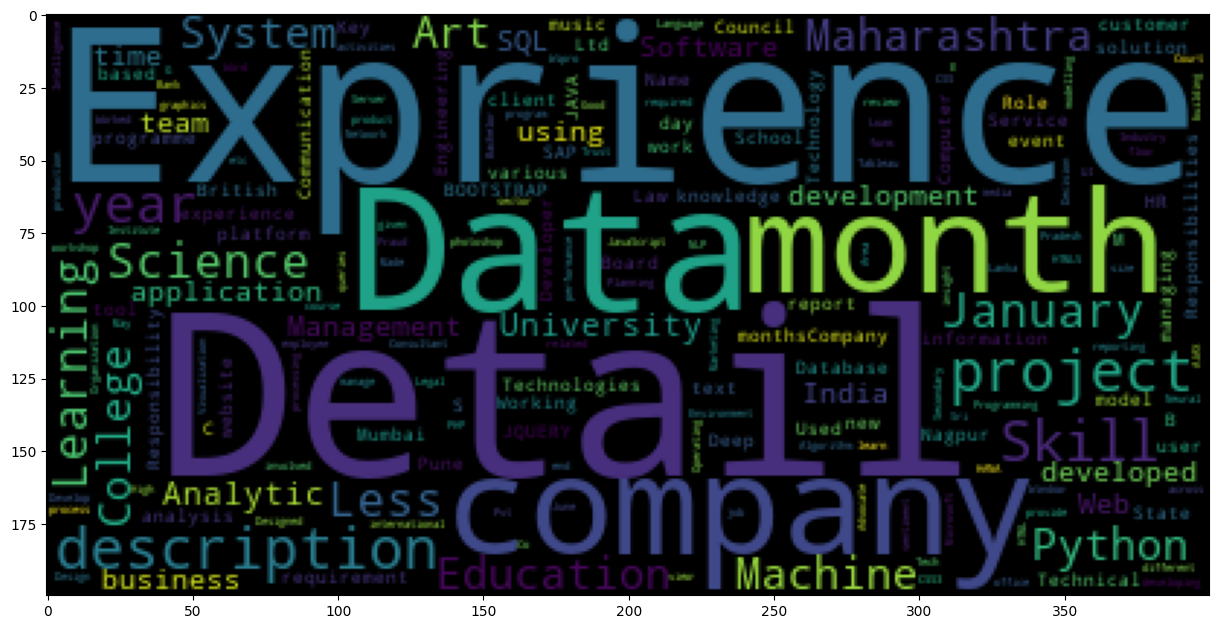

In [55]:
wc1=WordCloud(collocations=False).generate(" ".join(totalWords))
plt.figure(figsize=(15,15))
plt.imshow(wc1)
plt.savefig('wordcloud.jpg')

In [35]:
x=df['Resume']
y= df['Category']

### TF*IDF Vectorizer

In [36]:
cleaned = x.apply(lambda a: cleanResume(a))

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
tfidf = TfidfVectorizer()

In [39]:
x_vect=tfidf.fit_transform(cleaned)

In [40]:
x_vect.shape

(962, 7566)

### Cross Validation

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test=train_test_split(x_vect, y, random_state=0, stratify=y)

In [42]:
x_train.shape, x_test.shape

((721, 7566), (241, 7566))

### Build the model

In [43]:
from sklearn.neighbors import NearestCentroid

In [44]:
clf= NearestCentroid()
clf.fit(x_train, y_train)

NearestCentroid()

#### Performance Evaluation

In [45]:
y_pred= clf.predict(x_test)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe1852b32e0>
Traceback (most recent call last):
  File "/home/dai/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/dai/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dai/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/dai/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'split

In [46]:
from sklearn.metrics import accuracy_score, classification_report

In [47]:
print(classification_report(y_test,y_pred))

                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         5
                     Arts       1.00      1.00      1.00         9
       Automation Testing       1.00      1.00      1.00         6
               Blockchain       1.00      1.00      1.00        10
         Business Analyst       1.00      1.00      1.00         7
           Civil Engineer       1.00      1.00      1.00         6
             Data Science       1.00      0.90      0.95        10
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         7
            ETL Developer       1.00      1.00      1.00        10
   Electrical Engineering       1.00      1.00      1.00         8
                       HR       1.00      1.00      1.00        11
                   Hadoop       1.00      1.00      1.00     

In [56]:
accuracy_score(y_test,y_pred)

0.991701244813278

In [59]:
f= open("Sample_resume.txt")
sample = f.read()

In [61]:
cleaned_sample = cleanResume(sample)

In [62]:
clf.predict(tfidf.transform([cleaned_sample]))

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe1801bafc0>
Traceback (most recent call last):
  File "/home/dai/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/dai/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dai/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/dai/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'split

array(['Data Science'], dtype=object)